# Challenge: Test Set

In [25]:
import pandas
import itertools

In [32]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [33]:
movies = catalog.load("movies")

2021-03-15 16:59:09,137 - kedro.io.data_catalog - INFO - Loading data from `movies` (ParquetDataSet)...


In [34]:
movies

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,genre_names
id,,,,,,,,,,,,,,,,,,,,,
2,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,,Ariel,False,6.8,128,NaN,None,None,None,"[Drama, Crime, Comedy]"
3,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,,Shadows in Paradise,False,7.2,125,NaN,None,None,None,"[Drama, Comedy]"
5,False,/u0zMKKpEdDWpOKmFW2sLbKKICJH.jpg,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,5.7,1901,NaN,None,None,None,"[Crime, Comedy]"
6,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",...,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.5,184,NaN,None,None,None,"[Action, Thriller, Crime]"
8,False,None,NaN,42000,"[{'id': 99, 'name': 'Documentary'}]",http://www.lifeinloops.com,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,...,A Megacities remix.,Life in Loops (A Megacities RMX),False,7.3,13,NaN,None,None,None,[Documentary]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,/AmHOQ7rpHwiaUMRjKXztnauSJb7.jpg,NaN,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,Enter the World of Pandora.,Avatar,False,7.5,23025,87096.0,Avatar Collection,/gC3tW9a45RGOzzSh6wv91pFnmFr.jpg,/syGPZuzcHBBHMLiNDN0x0Tms4Fk.jpg,"[Action, Adventure, Fantasy, Science Fiction]"
19996,False,None,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",,tt0932661,en,Brother's War,The story is set in the latter days of World W...,...,,Brother's War,False,3.9,14,NaN,None,None,None,"[Action, Drama]"
19997,False,/TNfPn4Fwi0Fqx4BsjxOL3Tmscw.jpg,NaN,1250000,"[{'id': 53, 'name': 'Thriller'}]",,tt0046126,en,Niagara,"Rose Loomis and her older, gloomier husband, G...",...,A raging torrent of emotion that even nature c...,Niagara,False,6.8,214,NaN,None,None,None,[Thriller]


In [35]:
movies_test = movies[["original_title", "poster_path", "genre_names"]].sample(n=1000)

In [36]:
movies_test

,original_title,poster_path,genre_names
id,,,
17335,Obsessed,/g7kv7RXzqCSMmiYmV0gVLpxB0YH.jpg,"[Drama, Thriller]"
757,Murder Most Foul,/qTCKB5rxYzgdWUUH4UMgpRVH3GJ.jpg,"[Comedy, Crime, Drama, Mystery, Thriller]"
11886,Robin Hood,/x9AvkYek0bGdxQSZ8W3lAjGrREm.jpg,"[Animation, Family]"
2115,Light of Day,/hFXnASDyZd3i9TOuBPUtJRvfZsK.jpg,"[Music, Drama]"
1915,"Manta, Manta",/cpc3fbClSG46azA1dNW0ilKvIgj.jpg,"[Comedy, Action]"
...,...,...,...
15111,All Day Every Day,None,[]
18002,"Love, Honour and Obey",/n4mq89w2Dgn2oDnYGtx5qnSmfTA.jpg,"[Action, Comedy, Thriller, Crime]"
1830,Lord of War,/xEdwdFZRwrNAvTDx0fAV3MAInaA.jpg,"[Crime, Drama, Thriller]"


<AxesSubplot:>

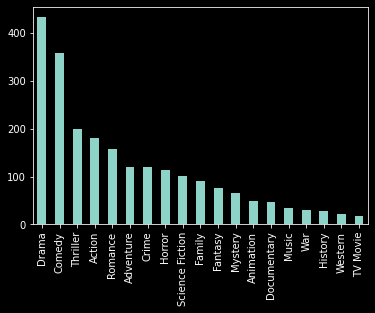

In [37]:
pandas.Series(
    itertools.chain.from_iterable(
        movies_test["genre_names"]
    )
).value_counts().plot(kind="bar")

In [38]:
pandas.Series(
    itertools.chain.from_iterable(
        movies_test["genre_names"]
    )
).value_counts().shape

(19,)

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

In [40]:
mlb = MultiLabelBinarizer()

In [41]:
mlb.fit(movies["genre_names"])

MultiLabelBinarizer()

In [46]:
genres = pandas.DataFrame(
    mlb.transform(movies_test["genre_names"]),
    columns=mlb.classes_,
    index=movies_test.index,
)

In [47]:
genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,
17335,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
757,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
11886,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2115,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1915,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18002,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1830,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
movies_test = movies_test.join(genres)

In [51]:
movies_test.to_csv("movies_test.csv", sep=";")

In [52]:
pandas.read_csv("movies_test.csv", sep=";")

,id,original_title,poster_path,genre_names,Action,Adventure,Animation,Comedy,Crime,Documentary,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,17335,Obsessed,/g7kv7RXzqCSMmiYmV0gVLpxB0YH.jpg,['Drama' 'Thriller'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,757,Murder Most Foul,/qTCKB5rxYzgdWUUH4UMgpRVH3GJ.jpg,['Comedy' 'Crime' 'Drama' 'Mystery' 'Thriller'],0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,11886,Robin Hood,/x9AvkYek0bGdxQSZ8W3lAjGrREm.jpg,['Animation' 'Family'],0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2115,Light of Day,/hFXnASDyZd3i9TOuBPUtJRvfZsK.jpg,['Music' 'Drama'],0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1915,"Manta, Manta",/cpc3fbClSG46azA1dNW0ilKvIgj.jpg,['Comedy' 'Action'],1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15111,All Day Every Day,NaN,[],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,18002,"Love, Honour and Obey",/n4mq89w2Dgn2oDnYGtx5qnSmfTA.jpg,['Action' 'Comedy' 'Thriller' 'Crime'],1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
997,1830,Lord of War,/xEdwdFZRwrNAvTDx0fAV3MAInaA.jpg,['Crime' 'Drama' 'Thriller'],0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
998,4494,Arrebato,/nSZudIenEYBUrOIyNbyi1pdknyU.jpg,['Drama' 'Fantasy' 'Horror'],0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
